In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [2]:
## IRIS
### 1. iris 품종별 개수 보기
### 2. 품종으로 그룹을 만들고 petal_length에 대한 품종별 개수 구하기
### 3. 품종을 제외한 나머지 컬럼의 이름을 SL, SW, PL, PW, 품종으로 변경하고 새로운 dataFrame 생성
### 4. SL, SW 컬럼에서 10번째 ~ 20번째까지의 데이터 추출
### 5. 각 컬럼에 대해서 boxplot, histogram, scatter 를 사용하여 데이터분포 확인
### 6. 평균, 분산,사분위 값 구하기
### 7. 각 컬럼에서 랜덤하게 3개 이상의 결측치로 대체하기
### 8. 결측치를 숫자정보와 시각화로 확인
### 9. 결측치를 적절한 값으로 대체하기
# 표준화 처리
### 10. 이상치가 있는지 확인하고 처리하기.
# z-score: 이상치 처리(2보다 크면 이상치 간주)
# IQR: z-score보다 좋음
# 11. 정규화
# 12. 데이터셋 분리
# 13. 모델 생성 및 학습
# 14. MSE, R2 score 확인

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
df_iris = sns.load_dataset('iris')
rename_iris = {'sepal_length':'SL','sepal_width':'SW','petal_length':'PL','petal_width':'PW'}
df_iris = df_iris.rename(columns=rename_iris)
df_iris

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
target = df_iris[['species']]

In [6]:
target.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
target =  target.replace(['setosa','versicolor','virginica'],[1,2,3])

In [8]:
target

,species
0,1
1,1
2,1
3,1
4,1
...,...
145,3
146,3
147,3
148,3


In [9]:
df_iris = df_iris.drop(columns='species',axis=1)

In [10]:
for i in range(len(df_iris.columns)):
  for j in range(10):
    rand_index =np.random.randint(low=0, high=len(df_iris['SL']))
    df_iris.iloc[rand_index,i]=np.nan

<AxesSubplot:>

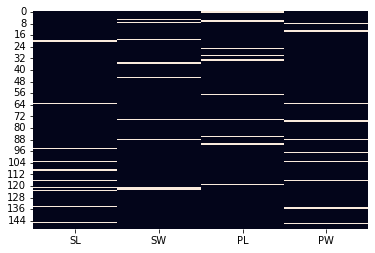

In [11]:
# 8. 결측치를 숫자정보와 시각화로 확인
df_iris.isnull().sum()
sns.heatmap(df_iris.isnull(),cbar=False)

<AxesSubplot:>

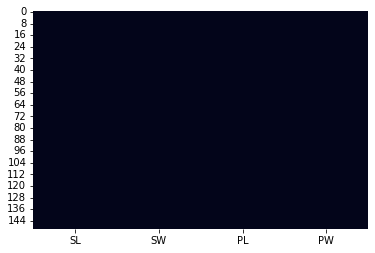

In [12]:
# 9. 결측치를 적절한 값으로 대체하기

from sklearn.impute import SimpleImputer
imp_mean= SimpleImputer(strategy='mean')
imp_fre = SimpleImputer(strategy='most_frequent')
# 평균 대체
df_iris = pd.DataFrame(imp_fre.fit_transform(df_iris),columns=df_iris.columns)
sns.heatmap(df_iris.isnull(),cbar=False)

In [13]:
# 표준화
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_iris, target, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.score(X_test,y_test)

0.9035090096294759

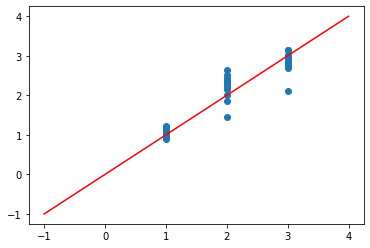

In [16]:
pred = model.predict(X_test)
exp = y_test
plt.scatter(exp, pred)
plt.plot([-1,4],[-1,4],'r')

In [21]:
scaler = StandardScaler()
iris_sc = scaler.fit_transform(df_iris)
iris_df_sc = pd.DataFrame(data=iris_sc, columns=df_iris.columns)
iris_df_sc.var()

SL    1.006711
SW    1.006711
PL    1.006711
PW    1.006711
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scal_mx = MinMaxScaler()
iris_sc_mx = scal_mx.fit_transform(iris_df_sc)
iris_sc_mx

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris_sc_mx,target,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.score(X_train, y_train)


0.8745728790909091

In [25]:
y_pred = model.predict(X_test)

In [27]:
mean_squared_error(y_test,y_pred)

0.07916448216253304

In [28]:
r2_score(y_test,y_pred)

0.855055988807297

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

pred = model2.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7555555555555555